# **Hierarchical Clustering**

Hierarchical clustering is a popular unsupervised machine learning algorithm used to group data points into clusters based on their similarity. Unlike partition-based methods like K-Means, hierarchical clustering builds a hierarchy of clusters.


## **Concepts**

### **What is Hierarchical Clustering?**

Hierarchical clustering creates a tree-like structure called a dendrogram, representing how data points can be grouped together. It allows us to explore the data at multiple levels of granularity by cutting the dendrogram at different heights.


### **Types of Hierarchical Clustering**

1. **Agglomerative Clustering** (Bottom-Up Approach):  
   Starts with each data point as an individual cluster and iteratively merges clusters based on similarity until a single cluster is formed.

2. **Divisive Clustering** (Top-Down Approach):  
   Starts with all data points in one cluster and iteratively splits clusters until each data point becomes its own cluster.


![Types of Hierarchical Clustering.png](../images/Hierarchical%20Clustering%20types.png)

##
---

## **How Hierarchical Clustering Works**

### **Agglomerative Clustering Steps**:

1. Treat each data point as a cluster.
2. Compute the similarity or distance matrix between clusters.
3. Merge the two closest clusters.
4. Update the distance matrix.
5. Repeat steps 3 and 4 until all points are merged into a single cluster.

### **Divisive Clustering Steps**:

1. Start with all data points in a single cluster.
2. Split the cluster into smaller clusters based on dissimilarity.
3. Repeat until each data point forms its own cluster.

![Agg vs Divisive.png](../images/agg_divisive.png)

##
---

## **Mathematical Concepts**

### **Distance Metrics**

Hierarchical clustering relies on a distance metric to measure similarity between data points or clusters. Common metrics include:

1. **Euclidean Distance**:
   $$
   d(x, y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}
   $$
2. **Manhattan Distance**:
   $$
   d(x, y) = \sum_{i=1}^{n} |x_i - y_i|
   $$
3. **Cosine Similarity**:
   $$
   \text{similarity}(x, y) = \frac{x \cdot y}{||x|| \, ||y||}
   $$


### **Linkage Criteria**

Linkage criteria determine how distances are computed between clusters:

1. **Single Linkage**:
   $$
   d(A, B) = \min_{a \in A, b \in B} d(a, b)
   $$
2. **Complete Linkage**:
   $$
   d(A, B) = \max_{a \in A, b \in B} d(a, b)
   $$
3. **Average Linkage**:
   $$
   d(A, B) = \frac{1}{|A| \cdot |B|} \sum_{a \in A} \sum_{b \in B} d(a, b)
   $$
4. **Centroid Linkage**:
   $$
   d(A, B) = ||\mu_A - \mu_B||
   $$
   Where \( $\mu_A$ \) and \( $\mu_B $\) are the centroids of clusters \( A \) and \( B \).


##
---

## **Dendrogram**

A dendrogram is a tree-like diagram that visualizes the hierarchy of clusters. The height of each node represents the distance (or dissimilarity) at which clusters are merged.

```python
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=0.7)

# Compute linkage matrix
Z = linkage(X, method='ward')  # Ward's method for linkage

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5, leaf_rotation=90., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()
```

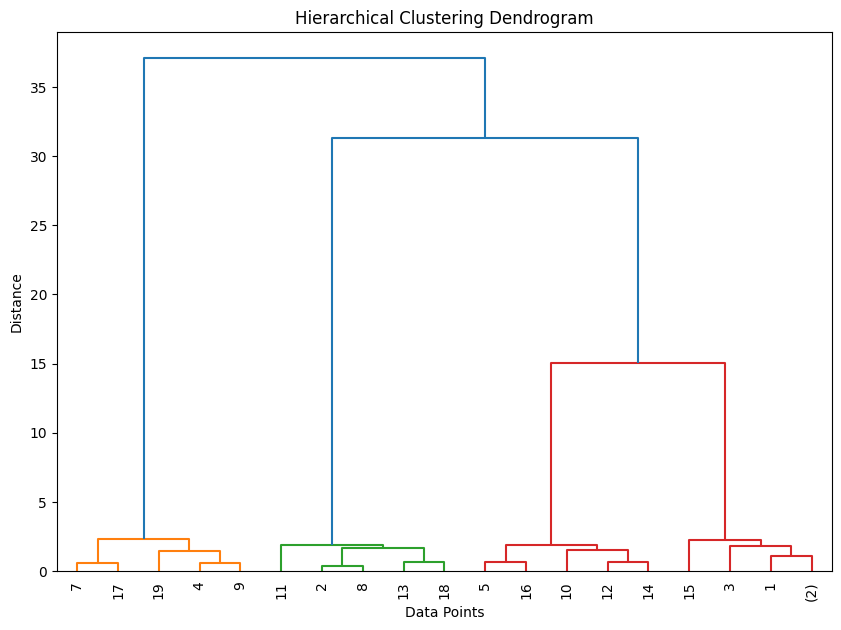

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic dataset
X, y = make_blobs(n_samples=20, centers=4, random_state=42, cluster_std=0.7)

# Compute linkage matrix
Z = linkage(X, method='ward')  # Ward's method for linkage

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5, leaf_rotation=90., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

##
---

## **Advantages & Limitations**

### **Advantages**
- Does not require specifying the number of clusters in advance.
- Produces a hierarchy of clusters for exploratory analysis.

### **Limitations**
- Computationally expensive for large datasets (\( O(n^3) \)).
- Sensitive to noise and outliers.

##
---

## **Python Implementation**

```python
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic dataset
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=0.7)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data")
plt.show()
```

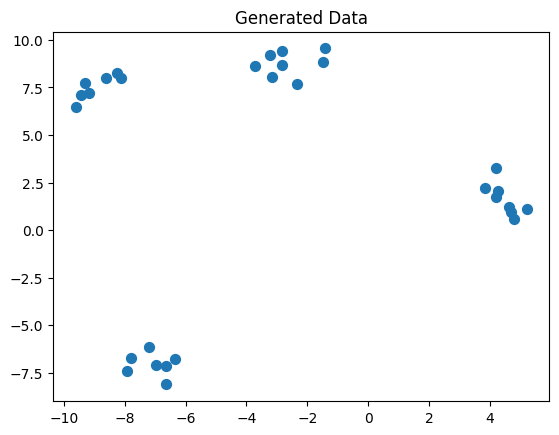

In [12]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic dataset
X, y = make_blobs(n_samples=30, centers=4, random_state=42, cluster_std=0.7)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data")
plt.show()

### 1. Dendrogram Using Scipy

```python
# Compute linkage matrix
Z = linkage(X, method='ward')  # Ward's method for linkage

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5, leaf_rotation=90., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()
```

### 2. Agglomerative Clustering (Sklearn)

```python
# Perform agglomerative clustering
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_pred = model.fit_predict(X)

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50)
plt.title("Agglomerative Clustering")
plt.show()
```

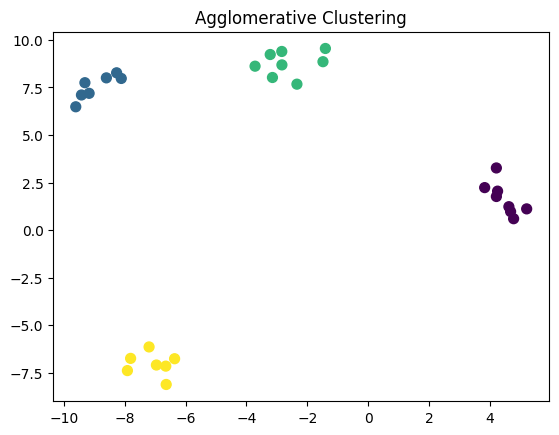

In [13]:
# Perform agglomerative clustering
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_pred = model.fit_predict(X)

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50)
plt.title("Agglomerative Clustering")
plt.show()

### 3. Comparing Linkage Methods

```python
methods = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(15, 10))
for i, method in enumerate(methods):
    Z = linkage(X, method=method)
    plt.subplot(2, 2, i+1)
    dendrogram(Z, truncate_mode='level', p=5)
    plt.title(f"Dendrogram ({method.capitalize()} Linkage)")
plt.tight_layout()
plt.show()
```

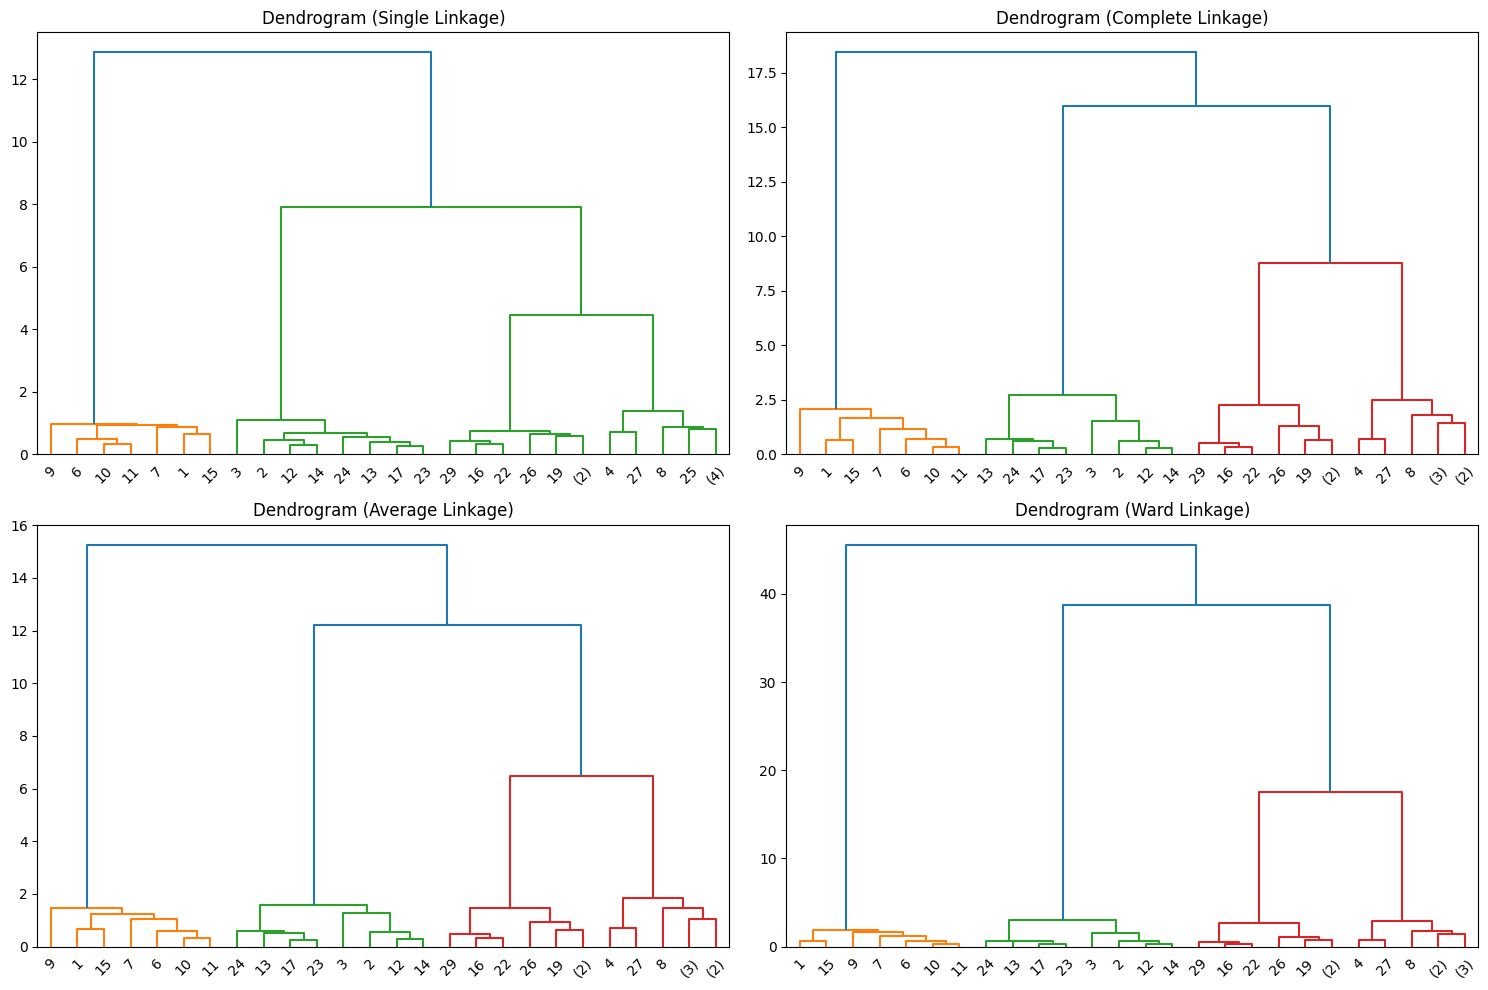

In [14]:
methods = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(15, 10))
for i, method in enumerate(methods):
    Z = linkage(X, method=method)
    plt.subplot(2, 2, i+1)
    dendrogram(Z, truncate_mode='level', p=5)
    plt.title(f"Dendrogram ({method.capitalize()} Linkage)")
plt.tight_layout()
plt.show()

### 4. Divisive Clustering

Divisive clustering is not directly implemented in popular Python libraries like Scipy or Sklearn. However, it can be simulated using custom implementations.

**Example**: Bisecting K-Means for divisive clustering.

```python
from sklearn.cluster import KMeans

def divisive_clustering(X, max_clusters=4):
    clusters = [X]
    while len(clusters) < max_clusters:
        largest_cluster = max(clusters, key=len)
        clusters.remove(largest_cluster)
        
        kmeans = KMeans(n_clusters=2, random_state=42).fit(largest_cluster)
        cluster_1 = largest_cluster[kmeans.labels_ == 0]
        cluster_2 = largest_cluster[kmeans.labels_ == 1]
        
        clusters.append(cluster_1)
        clusters.append(cluster_2)
    return clusters

# Apply divisive clustering
clusters = divisive_clustering(X, max_clusters=4)

# Plot results
colors = ['red', 'blue', 'green', 'orange']
plt.figure(figsize=(8, 6))
for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1], s=50, color=colors[i])
plt.title("Divisive Clustering")
plt.show()
```

##
---

## **Applications**

- Gene expression analysis in bioinformatics.

- Customer segmentation in marketing.

- Document clustering in text mining.

##
---

## **Conclusion**

Hierarchical clustering is a versatile method for grouping data without requiring a predefined number of clusters. Agglomerative clustering is commonly used due to its simplicity, while divisive clustering offers an alternative perspective.